In [1]:
import pandas as pd
import urllib.request
import matplotlib
from datetime import datetime, timedelta

## Download latest covid cases file

In [2]:
url = 'https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv'
urllib.request.urlretrieve(url, "Covid19Casos.csv")

('Covid19Casos.csv', <http.client.HTTPMessage at 0x5f457c0>)

In [3]:
urlDeterminaciones = 'https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Determinaciones.csv'
urllib.request.urlretrieve(urlDeterminaciones, "Covid19Determinaciones.csv")

('Covid19Determinaciones.csv', <http.client.HTTPMessage at 0x4376ce8>)

## CSV to Dataframe

In [4]:
covidDF = pd.read_csv('Covid19Casos.csv')

## Useful transformantions

In [5]:
covidConfirmedDF = covidDF[covidDF['clasificacion_resumen'] == 'Confirmado']
covidDeathsDF = covidDF[covidDF['fallecido'] == 'SI']

## Daily Report

In [7]:
dailyCases = covidConfirmedDF[covidConfirmedDF['fecha_apertura'] == datetime.now().date().strftime('%Y-%m-%d')]
print(dailyCases.size)
display(dailyCases.head(5))

0


,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion


## Infected by Province

,count
residencia_provincia_nombre,
Buenos Aires,501049
CABA,139492
Santa Fe,80873
Córdoba,64567
Mendoza,37837
Tucumán,36113
Río Negro,19417
Jujuy,17279
Salta,16458


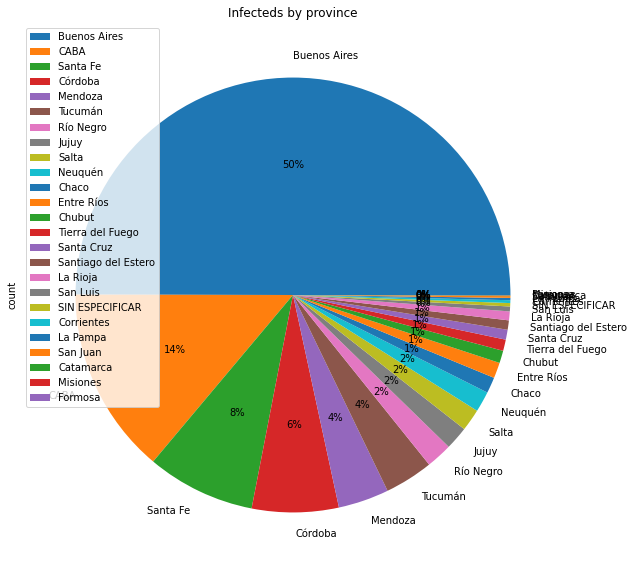

In [8]:
casesPerProvince = covidConfirmedDF.copy()
casesPerProvince['count'] = covidConfirmedDF.groupby('residencia_provincia_nombre')['residencia_provincia_nombre'].transform('count')
casesPerProvince = casesPerProvince[['residencia_provincia_nombre', 'count']].groupby('residencia_provincia_nombre').count().reset_index().sort_values('count', ascending=False)
casesPerProvince.set_index('residencia_provincia_nombre').plot.pie(y='count', autopct='%1.0f%%', figsize=(10,10)).set_title("Infecteds by province")
casesPerProvince.set_index('residencia_provincia_nombre')

## Deaths by Province


,count
residencia_provincia_nombre,
Buenos Aires,19513
CABA,5675
Santa Fe,977
Córdoba,967
Mendoza,894
Salta,770
Jujuy,748
Chaco,582
Río Negro,569


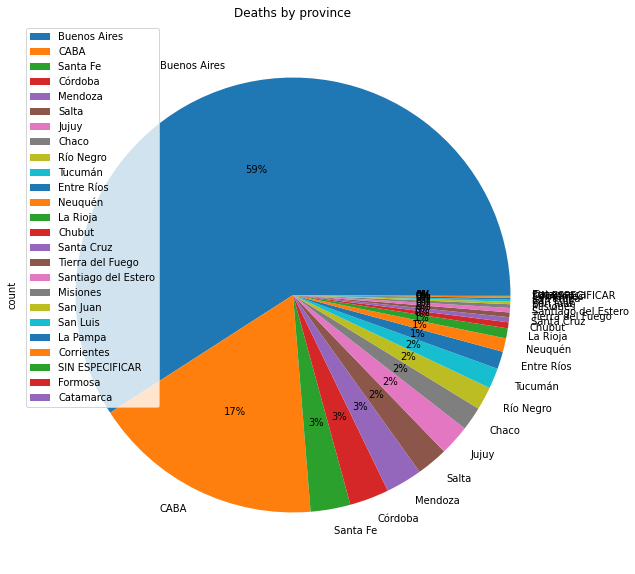

In [9]:
deathsPerProvince = covidDeathsDF.copy()
deathsPerProvince['count'] = deathsPerProvince.groupby('residencia_provincia_nombre')['residencia_provincia_nombre'].transform('count')
deathsPerProvince = deathsPerProvince[['residencia_provincia_nombre', 'count']].groupby('residencia_provincia_nombre').count().reset_index().sort_values('count', ascending=False)
deathsPerProvince.set_index('residencia_provincia_nombre').plot.pie(y='count', autopct='%1.0f%%', figsize=(10,10)).set_title("Deaths by province")
deathsPerProvince.set_index('residencia_provincia_nombre')

## Deaths and infecteds by age

        count
edad         
30.0   238431
20.0   204836
40.0   194127
50.0   131630
60.0    74588
10.0    56517
70.0    39896
0.0     25870
80.0    23962
90.0     8272
100.0     267
120.0      75
110.0       8
220.0       1
       count
edad        
70.0    8670
80.0    8190
60.0    6875
50.0    3271
90.0    3213
40.0    1518
30.0     615
20.0     294
100.0    121
10.0      83
0.0       67
120.0      8


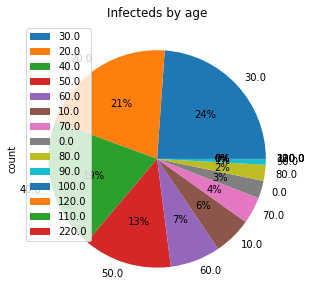

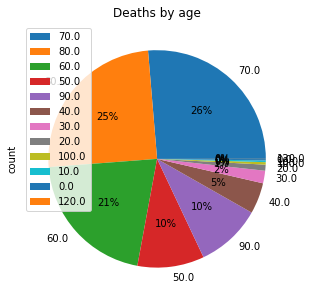

In [10]:
infectedsByAge = covidConfirmedDF[covidConfirmedDF['edad_años_meses'] == 'Años'].copy(deep=True)
infectedsByAge['edad'] = infectedsByAge['edad'].apply(lambda x: x - (x % 10))
infectedsByAge['count'] = infectedsByAge.groupby('edad')['edad'].transform('count')
infectedsByAge = infectedsByAge[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
infectedsByAge.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Infecteds by age")
print(infectedsByAge.set_index('edad').head(20))

deathsByAge = covidDeathsDF[covidDeathsDF['edad_años_meses'] == 'Años'].copy(deep=True)
deathsByAge['edad'] = deathsByAge['edad'].apply(lambda x: x - (x % 10))
deathsByAge['count'] = deathsByAge.groupby('edad')['edad'].transform('count')
deathsByAge = deathsByAge[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
deathsByAge.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Deaths by age")
print(deathsByAge.set_index('edad').head(20))

## Deaths and infected by genre

Text(0.5, 1.0, 'Deaths by Genre')

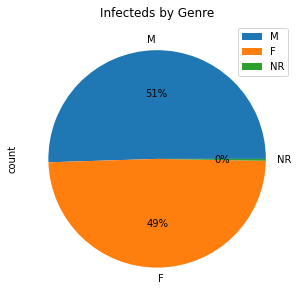

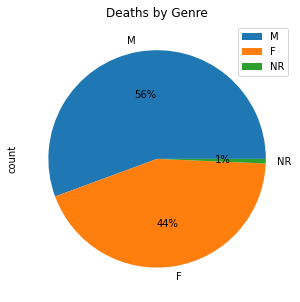

In [11]:
infectedsByGenre = covidConfirmedDF.copy()
infectedsByGenre['count'] = infectedsByGenre.groupby('sexo')['sexo'].transform('count')
infectedsByGenre = infectedsByGenre[['sexo', 'count']].groupby('sexo').count().reset_index().sort_values('count', ascending=False)
infectedsByGenre.set_index('sexo').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Infecteds by Genre")

deathsByGenre = covidDeathsDF.copy()
deathsByGenre['count'] = deathsByGenre.groupby('sexo')['sexo'].transform('count')
deathsByGenre = deathsByGenre[['sexo', 'count']].groupby('sexo').count().reset_index().sort_values('count', ascending=False)
deathsByGenre.set_index('sexo').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Deaths by Genre")

### Bonus Track: Biggers than hundred years and newborns

       count
edad        
120.0     75
101.0     54
102.0     47
103.0     18
104.0     10
105.0      9
119.0      7
107.0      3
106.0      2
108.0      2
110.0      1
220.0      1
       count
edad        
101.0     29
102.0     20
103.0     12
120.0      8
104.0      6
105.0      3
107.0      1
108.0      1
      count
edad       
8.0     443
9.0     420
10.0    414
7.0     406
11.0    391
6.0     352
4.0     305
5.0     301
3.0     236
2.0     211
1.0     136
0.0      72
      count
edad       
3.0       9
8.0       9
4.0       8
2.0       5
5.0       5
9.0       5
10.0      5
1.0       4
7.0       3
0.0       2
6.0       2


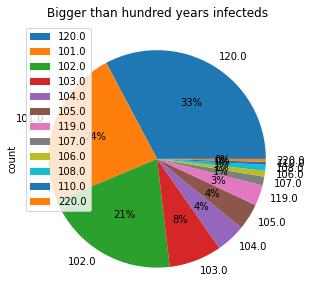

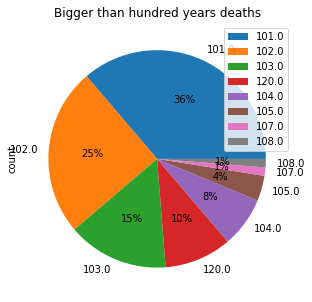

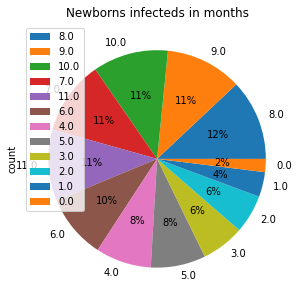

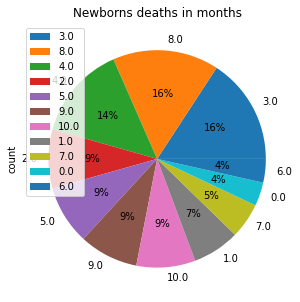

In [12]:
hundredYearsInfecteds = covidConfirmedDF[covidConfirmedDF['edad_años_meses'] == 'Años']
hundredYearsInfecteds = hundredYearsInfecteds[hundredYearsInfecteds['edad'] > 100.0]
hundredYearsInfecteds['count'] = hundredYearsInfecteds.groupby('edad')['edad'].transform('count')
hundredYearsInfecteds = hundredYearsInfecteds[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
hundredYearsInfecteds.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Bigger than hundred years infecteds")
print(hundredYearsInfecteds.set_index('edad').head(20))
# It appears that the value 120.0 it's a mispeal in the data entry cause there is no registry of people with that age in Argentina

hundredYearsDeaths = covidDeathsDF[covidDeathsDF['edad_años_meses'] == 'Años']
hundredYearsDeaths = hundredYearsDeaths[hundredYearsDeaths['edad'] > 100.0]
hundredYearsDeaths['count'] = hundredYearsDeaths.groupby('edad')['edad'].transform('count')
hundredYearsDeaths = hundredYearsDeaths[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
hundredYearsDeaths.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Bigger than hundred years deaths")
print(hundredYearsDeaths.set_index('edad').head(20))

newbornsInfecteds = covidConfirmedDF[covidConfirmedDF['edad_años_meses'] != 'Años'].copy()
newbornsInfecteds['count'] = newbornsInfecteds.groupby('edad')['edad'].transform('count')
newbornsInfecteds = newbornsInfecteds[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
newbornsInfecteds.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Newborns infecteds in months")
print(newbornsInfecteds.set_index('edad').head(20))

newbornsYearsDeaths = covidDeathsDF[covidDeathsDF['edad_años_meses'] != 'Años'].copy()
newbornsYearsDeaths['count'] = newbornsYearsDeaths.groupby('edad')['edad'].transform('count')
newbornsYearsDeaths = newbornsYearsDeaths[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
newbornsYearsDeaths.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Newborns deaths in months")
print(newbornsYearsDeaths.set_index('edad').head(20))


## Testeds by province

,count
residencia_provincia_nombre,
Buenos Aires,1193585
CABA,421533
Santa Fe,145044
Córdoba,136526
Mendoza,83929
Tucumán,74514
Chaco,60988
Jujuy,45317
Río Negro,40020


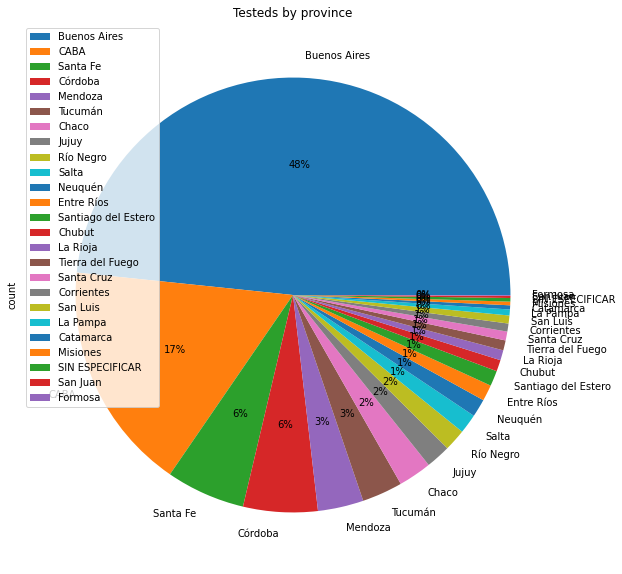

In [13]:
testedPerProvince = covidDF.copy()
testedPerProvince['count'] = testedPerProvince.groupby('residencia_provincia_nombre')['residencia_provincia_nombre'].transform('count')
testedPerProvince = testedPerProvince[['residencia_provincia_nombre', 'count']].groupby('residencia_provincia_nombre').count().reset_index().sort_values('count', ascending=False)
testedPerProvince.set_index('residencia_provincia_nombre').plot.pie(y='count', autopct='%1.0f%%', figsize=(10,10)).set_title("Testeds by province")
testedPerProvince.set_index('residencia_provincia_nombre')

## Deaths PBA vs CABA

,week,count
26,31-08-2020,277
4,30-03-2020,58
17,29-06-2020,270
30,28-09-2020,114
21,27-07-2020,292
8,27-04-2020,56
12,25-05-2020,151
25,24-08-2020,305
3,23-03-2020,27
16,22-06-2020,242


,week,count
25,31-08-2020,1311
3,30-03-2020,78
16,29-06-2020,623
29,28-09-2020,817
20,27-07-2020,1163
7,27-04-2020,146
11,25-05-2020,180
24,24-08-2020,1490
2,23-03-2020,32
15,22-06-2020,538


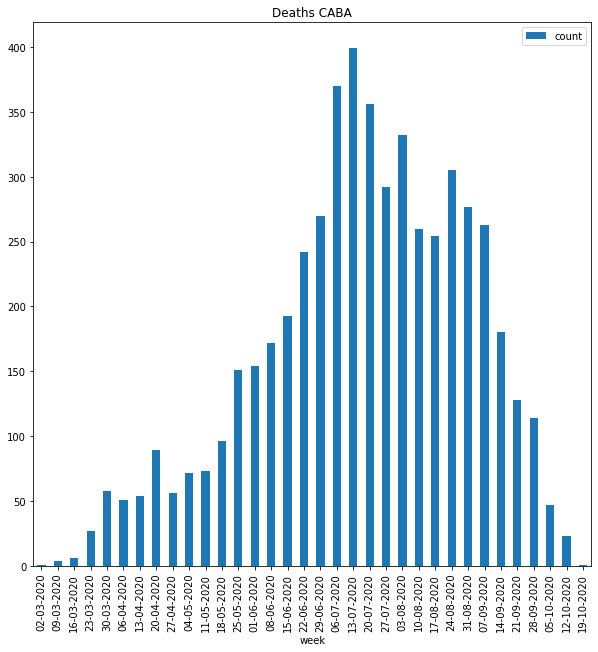

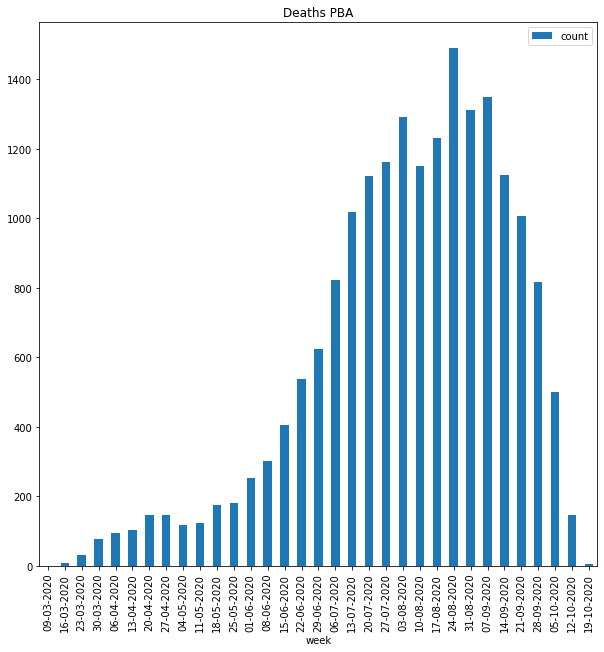

In [14]:
deathsCABA = covidDeathsDF[covidDeathsDF['residencia_provincia_nombre'] == 'CABA']
deathsCABA = deathsCABA[deathsCABA['fecha_fallecimiento'] != '']
deathsCABA['infected_date'] = pd.to_datetime(deathsCABA["fecha_diagnostico"], format='%Y-%m-%d')
deathsCABA['week'] = deathsCABA["infected_date"] - deathsCABA["infected_date"].dt.weekday * timedelta(days=1)
deathsCABA['count'] = deathsCABA.groupby('week')['week'].transform('count')
deathsCABA = deathsCABA[['week', 'count']].groupby('week').count().reset_index().sort_values('week', ascending=True)
deathsCABA['week'] = deathsCABA['week'].map(lambda t: t.strftime('%d-%m-%Y'))
deathsCABA.plot.bar(y='count', x='week', figsize=(10,10)).set_title("Deaths CABA")
display(deathsCABA.sort_values('week', ascending=False).head(10))

deathsPBA = covidDeathsDF[covidDeathsDF['residencia_provincia_nombre'] == 'Buenos Aires']
deathsPBA = deathsPBA[deathsPBA['fecha_fallecimiento'] != '']
deathsPBA['infected_date'] = pd.to_datetime(deathsPBA["fecha_diagnostico"], format='%Y-%m-%d')
deathsPBA['week'] = deathsPBA["infected_date"] - deathsPBA["infected_date"].dt.weekday * timedelta(days=1)
deathsPBA['count'] = deathsPBA.groupby('week')['week'].transform('count')
deathsPBA = deathsPBA[['week', 'count']].groupby('week').count().reset_index().sort_values('week', ascending=True)
deathsPBA['week'] = deathsPBA['week'].map(lambda t: t.strftime('%d-%m-%Y'))
deathsPBA.plot.bar(y='count', x='week', figsize=(10,10)).set_title("Deaths PBA")
display(deathsPBA.sort_values('week', ascending=False).head(10))

## Infected PBA vs CABA

,week,count
26,31-08-2020,7887
4,30-03-2020,185
17,29-06-2020,6255
30,28-09-2020,5615
21,27-07-2020,7814
8,27-04-2020,279
12,25-05-2020,2601
25,24-08-2020,9255
3,23-03-2020,183
16,22-06-2020,6321


,week,count
26,31-08-2020,34723
4,30-03-2020,179
17,29-06-2020,12034
30,28-09-2020,27420
21,27-07-2020,28125
8,27-04-2020,386
12,25-05-2020,1892
25,24-08-2020,37290
3,23-03-2020,173
16,22-06-2020,10044


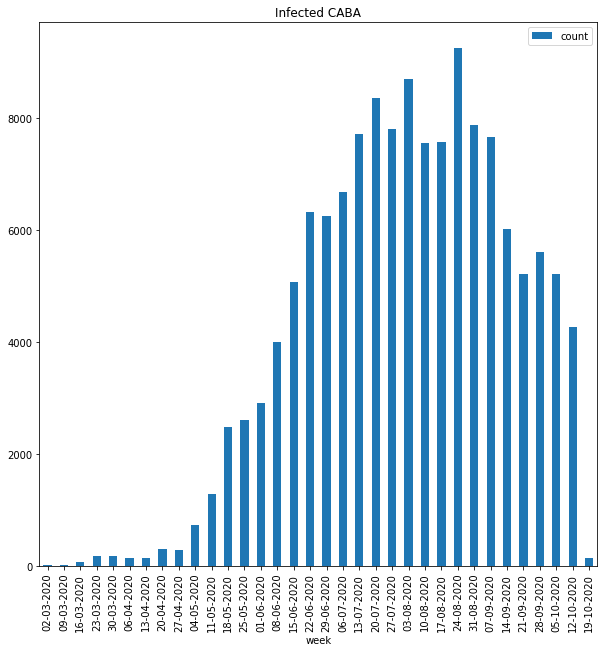

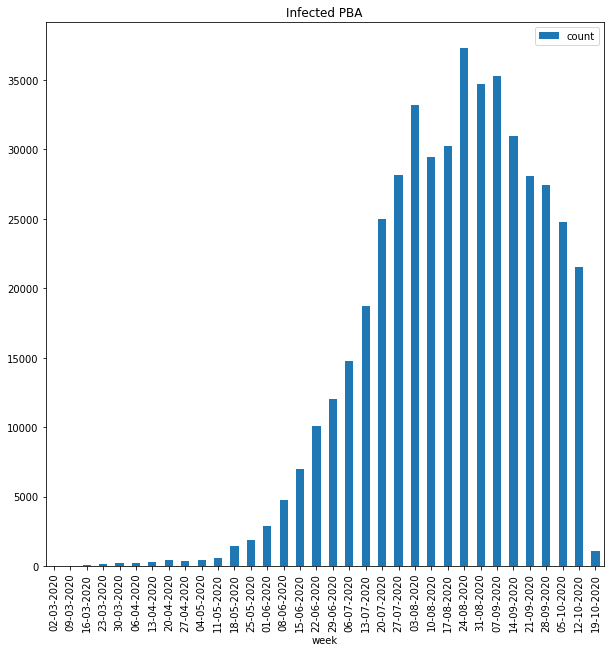

In [15]:
infectedCABA = covidConfirmedDF[covidConfirmedDF['residencia_provincia_nombre'] == 'CABA'].copy(deep=True)
infectedCABA['infected_date'] = pd.to_datetime(infectedCABA["fecha_diagnostico"], format='%Y-%m-%d')
infectedCABA['week'] = infectedCABA["infected_date"] - infectedCABA["infected_date"].dt.weekday * timedelta(days=1)
infectedCABA['count'] = infectedCABA.groupby('week')['week'].transform('count')
infectedCABA = infectedCABA[['week', 'count']].groupby('week').count().reset_index().sort_values('week', ascending=True)
infectedCABA['week'] = infectedCABA['week'].map(lambda t: t.strftime('%d-%m-%Y'))
infectedCABA.plot.bar(y='count', x='week', figsize=(10,10)).set_title("Infected CABA")
display(infectedCABA.sort_values('week', ascending=False).head(10))

infectedPBA = covidConfirmedDF[covidConfirmedDF['residencia_provincia_nombre'] == 'Buenos Aires'].copy(deep=True)
infectedPBA['infected_date'] = pd.to_datetime(infectedPBA["fecha_diagnostico"], format='%Y-%m-%d')
infectedPBA['week'] = infectedPBA["infected_date"] - infectedPBA["infected_date"].dt.weekday * timedelta(days=1)
infectedPBA['count'] = infectedPBA.groupby('week')['week'].transform('count')
infectedPBA = infectedPBA[['week', 'count']].groupby('week').count().reset_index().sort_values('week', ascending=True)
infectedPBA['week'] = infectedPBA['week'].map(lambda t: t.strftime('%d-%m-%Y'))
infectedPBA.plot.bar(y='count', x='week', figsize=(10,10)).set_title("Infected PBA")
display(infectedPBA.sort_values('week', ascending=False).head(10))